In [257]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(r'Customer_Data.csv')
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count:
0,1,26,1976,484197,245
1,2,26,835,27569,33
2,3,26,996,108525,109
3,4,28,1081,96221,89
4,5,26,2302,41431,18


Text(0, 0.5, 'Total Order Value')

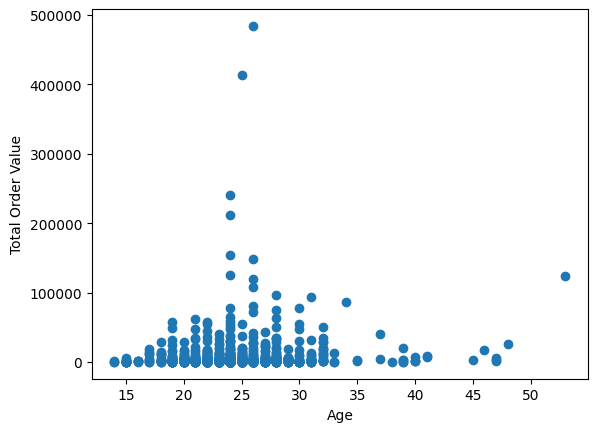

In [259]:
plt.scatter(df.Age,df['Total Order Value'])
plt.xlabel('Age')
plt.ylabel('Total Order Value')

In [260]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Total Order Value']])
y_predicted

array([1, 2, 0, ..., 2, 2, 2])

In [261]:
df['cluster']=y_predicted
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count:,cluster
0,1,26,1976,484197,245,1
1,2,26,835,27569,33,2
2,3,26,996,108525,109,0
3,4,28,1081,96221,89,0
4,5,26,2302,41431,18,0


In [262]:
km.cluster_centers_

array([[2.64000000e+01, 6.42598000e+04],
       [2.47500000e+01, 3.37315000e+05],
       [2.43449275e+01, 3.02119493e+03]])

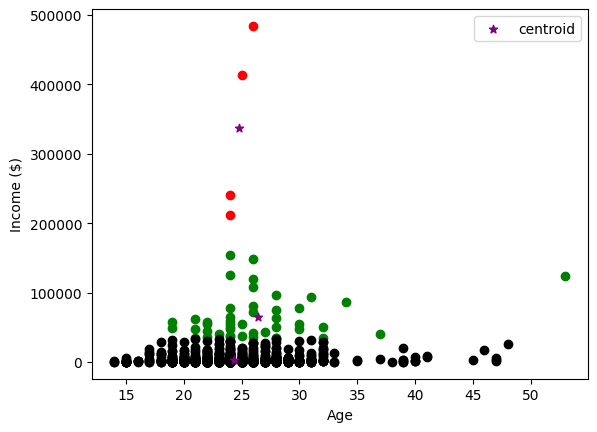

In [263]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]
plt.scatter(df1.Age,df1['Total Order Value'],color='green')
plt.scatter(df2.Age,df2['Total Order Value'],color='red')
plt.scatter(df3.Age,df3['Total Order Value'],color='black')
plt.scatter(df4.Age,df4['Total Order Value'],color='yellow')
plt.scatter(df5.Age,df5['Total Order Value'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [264]:
scaler = MinMaxScaler()

scaler.fit(df[['Total Order Value']])
df['Total Order Value'] = scaler.transform(df[['Total Order Value']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [265]:
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count:,cluster
0,1,0.307692,1976,1.000000,245,1
1,2,0.307692,835,0.056938,33,2
2,3,0.307692,996,0.224134,109,0
3,4,0.358974,1081,0.198723,89,0
4,5,0.307692,2302,0.085566,18,0


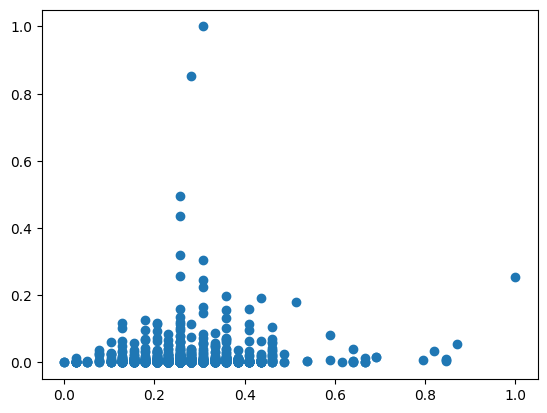

In [266]:
plt.scatter(df.Age,df['Total Order Value'])

In [267]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Age','Total Order Value']])
y_predicted

array([3, 0, 0, ..., 0, 0, 0])

In [268]:
df['cluster']=y_predicted
df.head()

,Member,Age,Average Order Value,Total Order Value,Total Order Count:,cluster
0,1,0.307692,1976,1.000000,245,3
1,2,0.307692,835,0.056938,33,0
2,3,0.307692,996,0.224134,109,0
3,4,0.358974,1081,0.198723,89,1
4,5,0.307692,2302,0.085566,18,0


In [269]:
km.cluster_centers_

array([[0.27259118, 0.00886637],
       [0.39349112, 0.01743211],
       [0.16368286, 0.00830981],
       [0.27564103, 0.69664827],
       [0.71794872, 0.02715915]])

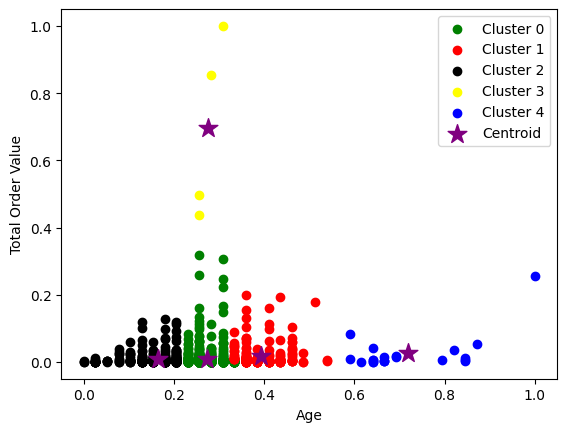

In [270]:
import matplotlib.pyplot as plt

# Assuming you already have clusters 0 through 4 in your dataset
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
df3 = df[df.cluster == 3]
df4 = df[df.cluster == 4]

# Plot each cluster with a different color
plt.scatter(df0.Age, df0['Total Order Value'], color='green', label='Cluster 0')
plt.scatter(df1.Age, df1['Total Order Value'], color='red', label='Cluster 1')
plt.scatter(df2.Age, df2['Total Order Value'], color='black', label='Cluster 2')
plt.scatter(df3.Age, df3['Total Order Value'], color='yellow', label='Cluster 3')
plt.scatter(df4.Age, df4['Total Order Value'], color='blue', label='Cluster 4')

# Plot centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', s=200, label='Centroid')

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Total Order Value')
plt.legend()
plt.show()


<h4 style='color:purple'>Elbow Plot</h4>

In [271]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Total Order Value']])
    sse.append(km.inertia_)

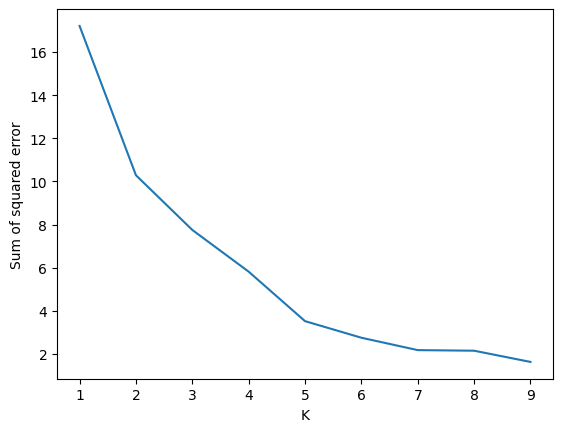

In [272]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)